<a href="https://colab.research.google.com/github/krishnaprasadb62/meachine-learning-project/blob/main/Liver_disorder_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***`Liver Cirrhosis And Healthy Liver Prediction`***

**Introduction**

**Death by liver cirrhosis continues to increase, given the increase in alcohol consumption rates, chronic hepatitis infections, and obesity-related liver disease. Notwithstanding the high mortality of this disease, liver diseases do not affect all sub-populations equally. The early detection of pathology is a determinant of patient outcomes, yet female patients appear to be marginalized when it comes to early diagnosis of liver pathology. The dataset comprises patient records collected from kerala, India. The prediction task is to determine whether a patient suffers from liver disease based on the information about several biochemical markers, including albumin and other enzymes required for metabolism**

**Import required libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

**Load dataset**

In [ ]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/project dataset/Indian_Liver_Patient_Dataset_(ILPD)[1].csv')
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


# **Exploratory DataAnalysis**

In [ ]:
df['Selector']=df['Selector'].map({1:1,2:0})




**how many of the Males(1) and Females(0) affecting the liver cirrhosis**

<Axes: xlabel='Gender', ylabel='count'>

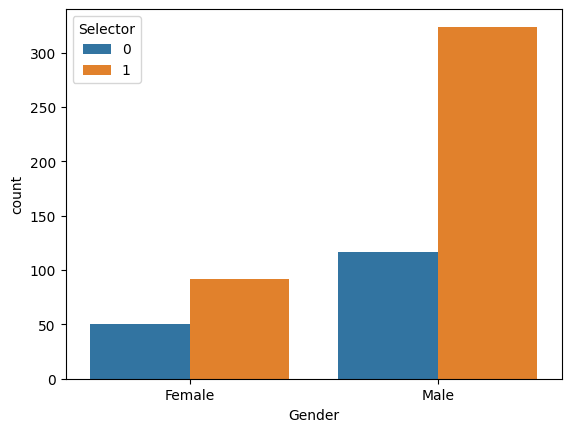

In [ ]:
sns.countplot(x='Gender',data=df,hue='Selector')

**how many of the persons affecting the liver cirrhosis**

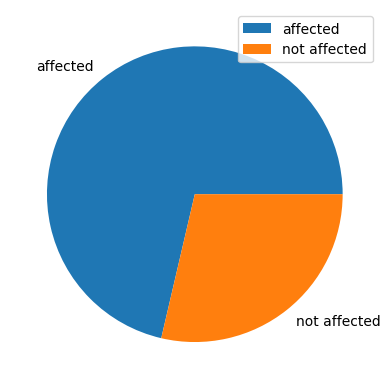

In [ ]:
x=[416,167]
y=["affected","not affected"]
plt.pie(x,labels=y)
plt.legend()
plt.show()

**Historical representation of Age**

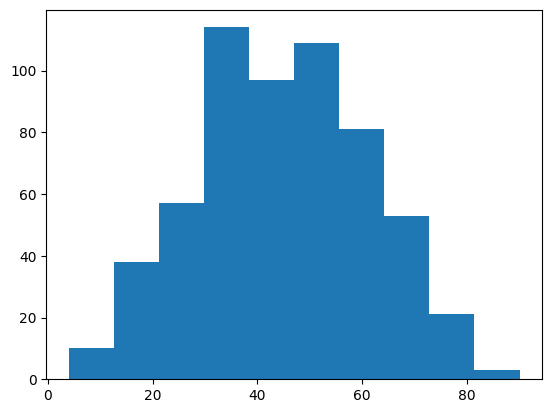

In [ ]:
x=df['Age']
plt.hist(x)
plt.show()

**cheaking datatypes**

In [ ]:
df.dtypes

Age            int64
Gender        object
TB           float64
DB           float64
Alkphos        int64
Sgpt           int64
Sgot           int64
TP           float64
ALB          float64
A/G Ratio    float64
Selector       int64
dtype: object

**checking missing value and missing value handling**

In [ ]:
df.isna().sum()

Age          0
Gender       0
TB           0
DB           0
Alkphos      0
Sgpt         0
Sgot         0
TP           0
ALB          0
A/G Ratio    4
Selector     0
dtype: int64

In [ ]:
df['A/G Ratio'].fillna(df['A/G Ratio'].median(),inplace=True)
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1


**coverting object datatype values into numeric**

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Gender']=le.fit_transform(df['Gender'],)
df

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00,1


**seperate input and output variables**

In [ ]:
x=df.iloc[:,0:-1]
x

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,5.9,1.6,0.37
579,40,1,0.6,0.1,98,35,31,6.0,3.2,1.10
580,52,1,0.8,0.2,245,48,49,6.4,3.2,1.00
581,31,1,1.3,0.5,184,29,32,6.8,3.4,1.00


In [ ]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Selector, Length: 583, dtype: int64

**Data normalization using MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[0.70930233, 0.        , 0.00402145, ..., 0.5942029 , 0.52173913,
        0.24      ],
       [0.6744186 , 1.        , 0.14075067, ..., 0.69565217, 0.5       ,
        0.176     ],
       [0.6744186 , 1.        , 0.0924933 , ..., 0.62318841, 0.52173913,
        0.236     ],
       ...,
       [0.55813953, 1.        , 0.00536193, ..., 0.53623188, 0.5       ,
        0.28      ],
       [0.31395349, 1.        , 0.01206434, ..., 0.5942029 , 0.54347826,
        0.28      ],
       [0.39534884, 1.        , 0.0080429 , ..., 0.66666667, 0.76086957,
        0.48      ]])

**spliting dataset into training and testing data**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.3,random_state=1)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(408, 10) (408,)
(175, 10) (175,)


**model creation:KNeighborsClassifier**

In [ ]:
knnc=KNeighborsClassifier(n_neighbors=3)
knnc.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred=knnc.predict(x_test)
y_pred

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**performance measures of knn**

              precision    recall  f1-score   support

           0       0.41      0.38      0.40        50
           1       0.76      0.78      0.77       125

    accuracy                           0.67       175
   macro avg       0.59      0.58      0.58       175
weighted avg       0.66      0.67      0.66       175



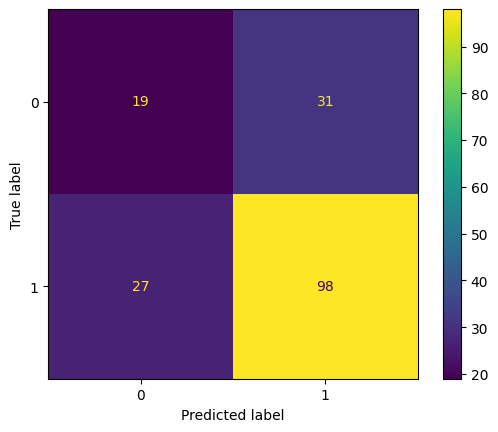

In [ ]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

**Hyperparameter Tuning:KNeighborsClassifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[1,3,5,7,9],'weights':['distance','uniform'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knnc,params,cv=10,scoring='accuracy')
clf.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['distance', 'uniform']},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
knnc1=KNeighborsClassifier(n_neighbors=9,algorithm='auto',weights='distance')
knnc1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [ ]:
y_pred_knnc1=knnc1.predict(x_test)
y_pred_knnc1

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**performance measure of tuned KNeighborsclassifier**

64.0
              precision    recall  f1-score   support

           0       0.33      0.26      0.29        50
           1       0.73      0.79      0.76       125

    accuracy                           0.64       175
   macro avg       0.53      0.53      0.53       175
weighted avg       0.62      0.64      0.63       175

ROC_AUC-SCORE= 52.6


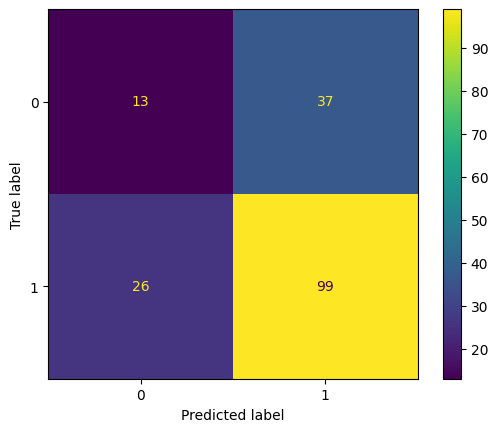

In [ ]:
print(accuracy_score(y_test,y_pred_knnc1)*100)
print(classification_report(y_test,y_pred_knnc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knnc1))
print("ROC_AUC-SCORE=",roc_auc_score(y_test,y_pred_knnc1)*100)

**ROC and AUC curve**

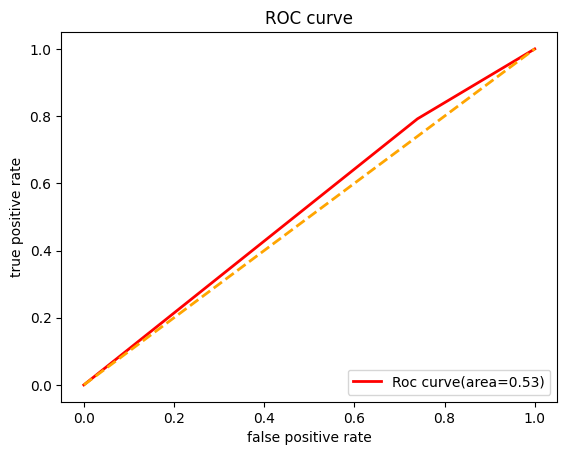

In [ ]:
fpr_knnc1,tpr_knnc1,treshold=roc_curve(y_test,y_pred_knnc1)
auc_knnc1=auc(fpr_knnc1,tpr_knnc1)
plt.figure()
lw=2
plt.plot(fpr_knnc1,tpr_knnc1,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_knnc1)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**model creation:SVC**

In [ ]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)

SVC()

In [ ]:
y_pred_svc=svc.predict(x_test)
y_pred_svc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**performance measure of svc**

              precision    recall  f1-score   support

           0       0.41      0.38      0.40        50
           1       0.76      0.78      0.77       125

    accuracy                           0.67       175
   macro avg       0.59      0.58      0.58       175
weighted avg       0.66      0.67      0.66       175



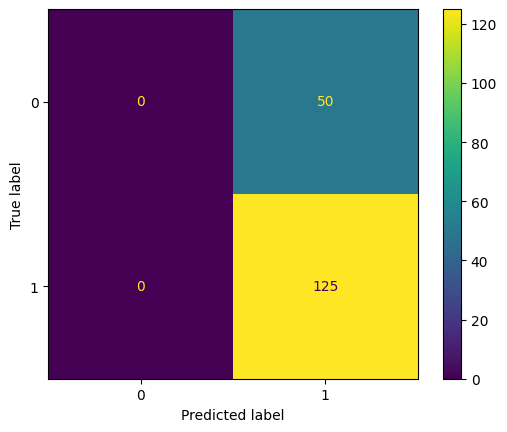

In [ ]:
print(classification_report(y_test,y_pred))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc))

**Hyperparameter Tuning:SVC**

In [ ]:
params={'kernel':['linear','poly','rbf'],'gamma':['scale','auto'],'decision_function_shape':['ovo','ovr']}
clfs=GridSearchCV(svc,params,cv=10,scoring='accuracy')
clfs.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [ ]:
print(clfs.best_params_)

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'linear'}


In [ ]:
svc1=SVC(decision_function_shape='ovo',gamma='scale',kernel='linear')
svc1.fit(x_train,y_train)

SVC(decision_function_shape='ovo', kernel='linear')

In [ ]:
y_pred_svc1=svc1.predict(x_test)
y_pred_svc1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

**performance measures of tuned svc**

0.7142857142857143
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.71      1.00      0.83       125

    accuracy                           0.71       175
   macro avg       0.36      0.50      0.42       175
weighted avg       0.51      0.71      0.60       175

ROC_AUC_SCORE= 0.5


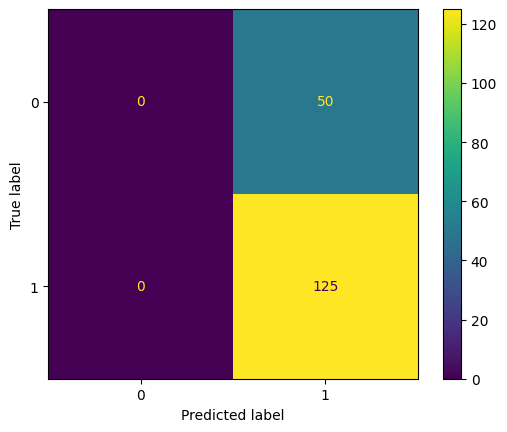

In [ ]:
print(accuracy_score(y_test,y_pred_svc1))
print(classification_report(y_test,y_pred_svc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_svc1))
print('ROC_AUC_SCORE=',roc_auc_score(y_test,y_pred_svc1))

**ROC AUC Curve**

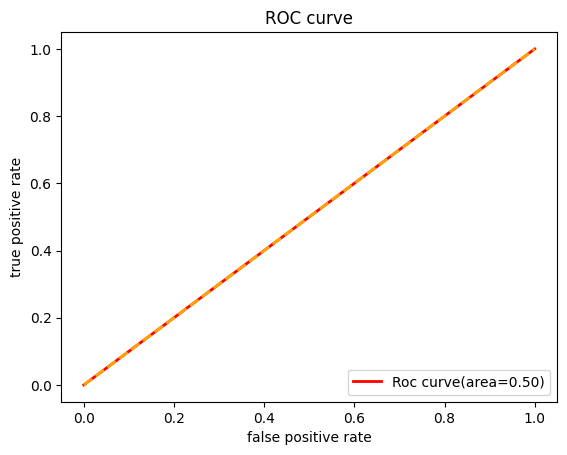

In [ ]:
fpr_svc1,tpr_svc1,treshold=roc_curve(y_test,y_pred_svc1)
auc_svc1=auc(fpr_svc1,tpr_svc1)
plt.figure()
lw=2
plt.plot(fpr_svc1,tpr_svc1,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_svc1)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Model Creation:Naive_Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbc=GaussianNB()
nbc.fit(x_train,y_train)

GaussianNB()

In [ ]:
y_pred_nbc=nbc.predict(x_test)
y_pred_nbc

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0])

**performance measures of Naives_Bayes**

0.6114285714285714
              precision    recall  f1-score   support

           0       0.42      0.96      0.59        50
           1       0.97      0.47      0.63       125

    accuracy                           0.61       175
   macro avg       0.69      0.72      0.61       175
weighted avg       0.81      0.61      0.62       175

ROC_AUC_SCORE= 0.716


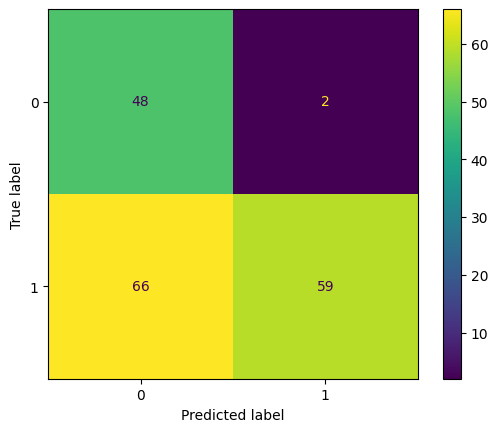

In [ ]:
print(accuracy_score(y_test,y_pred_nbc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nbc))
print(classification_report(y_test,y_pred_nbc))
print('ROC_AUC_SCORE=',roc_auc_score(y_test,y_pred_nbc))

**ROC AUC Curve**

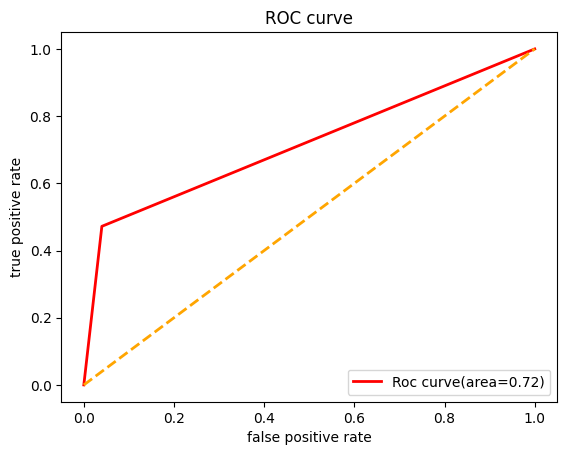

In [ ]:
fpr_nbc,tpr_nbc,treshold=roc_curve(y_test,y_pred_nbc)
auc_nbc=auc(fpr_nbc,tpr_nbc)
plt.figure()
lw=2
plt.plot(fpr_nbc,tpr_nbc,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_nbc)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Model Creation:DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
Dtc=DecisionTreeClassifier(criterion='entropy')
Dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_Dtc=Dtc.predict(x_test)
y_pred_Dtc

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0])

**performance of DecisionTreeClassifier**

              precision    recall  f1-score   support

           0       0.48      0.52      0.50        50
           1       0.80      0.78      0.79       125

    accuracy                           0.70       175
   macro avg       0.64      0.65      0.64       175
weighted avg       0.71      0.70      0.71       175



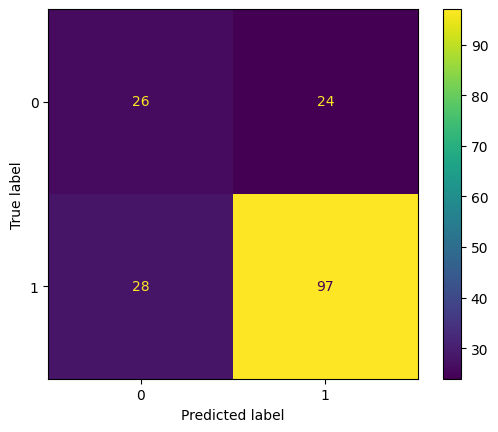

In [ ]:
print(classification_report(y_test,y_pred_Dtc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_Dtc))

**Hyperparameter Tuning:DecisionTreeClassifier**

In [ ]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[4,5,6,7,8,9,10]}
clfd=GridSearchCV(Dtc,params,cv=10,scoring='accuracy')
clfd.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(clfd.best_params_)

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}


In [ ]:
Dtc1=DecisionTreeClassifier(criterion='gini',max_depth=6,splitter='random',random_state=1)
Dtc1.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, random_state=1, splitter='random')

In [ ]:
y_pred_Dtc1=Dtc1.predict(x_test)
y_pred_Dtc1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1])

**performance measure of tuned DecisionTreeClassifier**

0.7142857142857143
              precision    recall  f1-score   support

           0       0.50      0.10      0.17        50
           1       0.73      0.96      0.83       125

    accuracy                           0.71       175
   macro avg       0.61      0.53      0.50       175
weighted avg       0.66      0.71      0.64       175

ROC_AUC_SCORE= 0.53


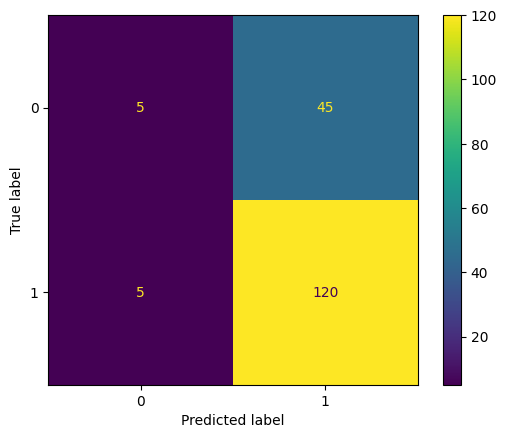

In [ ]:
print(accuracy_score(y_test,y_pred_Dtc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_Dtc1))
print(classification_report(y_test,y_pred_Dtc1))
print('ROC_AUC_SCORE=',roc_auc_score(y_test,y_pred_Dtc1))

**ROC AUC Curve**

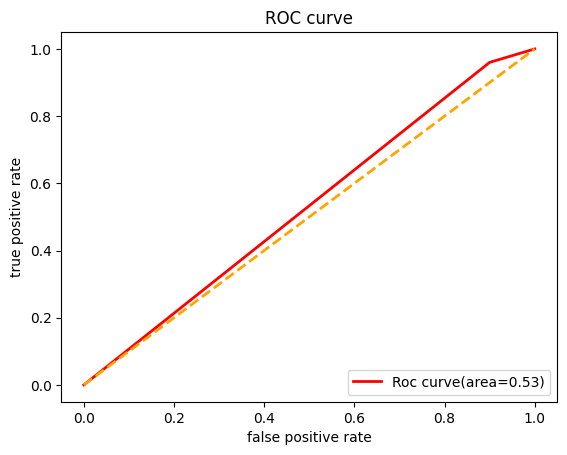

In [ ]:
fpr_Dtc1,tpr_Dtc1,treshold=roc_curve(y_test,y_pred_Dtc1)
auc_Dtc1=auc(fpr_Dtc1,tpr_Dtc1)
plt.figure()
lw=2
plt.plot(fpr_Dtc1,tpr_Dtc1,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_Dtc1)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Model Creation:RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc=RandomForestClassifier(criterion='entropy',n_estimators=50,random_state=1)
Rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=1)

In [ ]:
y_pred_Rfc=Rfc.predict(x_test)
y_pred_Rfc

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

**performance measures of RandomForestClassifer**

              precision    recall  f1-score   support

           0       0.50      0.36      0.42        50
           1       0.77      0.86      0.81       125

    accuracy                           0.71       175
   macro avg       0.63      0.61      0.61       175
weighted avg       0.69      0.71      0.70       175



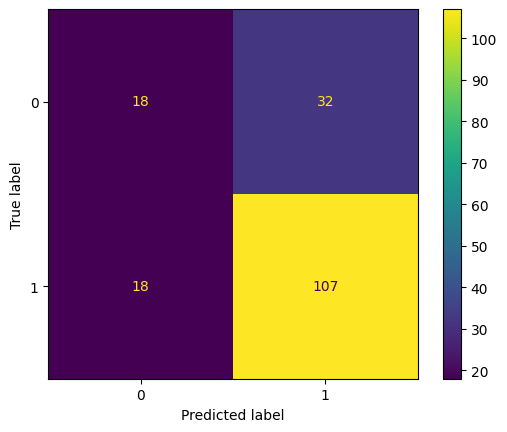

In [ ]:
print(classification_report(y_test,y_pred_Rfc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_Rfc))

**Hyperparameter Tuning:RandomForestClassifier**

In [ ]:
params={'n_estimators':[50,100,150,200],'max_features':['sqrt','log2'],'class_weight':['balanced','balanced_subsample'],'criterion':['gini','entropy']}
clfr=GridSearchCV(Rfc,params,cv=10,scoring='accuracy',)
clfr.fit(x_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=50, random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
print(clfr.best_params_)

{'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_features': 'sqrt', 'n_estimators': 50}


In [ ]:
Rfc1=RandomForestClassifier(class_weight='balanced',criterion='entropy',max_features='sqrt',n_estimators=200)
Rfc1.fit(x_train,y_train)


RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       n_estimators=200)

In [ ]:
y_pred_Rfc1=Rfc1.predict(x_test)
y_pred_Rfc1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0])

0.7085714285714285
              precision    recall  f1-score   support

           0       0.48      0.26      0.34        50
           1       0.75      0.89      0.81       125

    accuracy                           0.71       175
   macro avg       0.62      0.57      0.58       175
weighted avg       0.67      0.71      0.68       175

ROC_AUC_SCORE= 0.5740000000000001


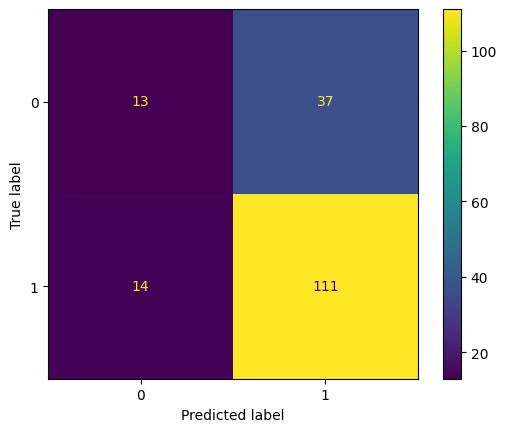

In [ ]:
print(accuracy_score(y_test,y_pred_Rfc1))
print(classification_report(y_test,y_pred_Rfc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_Rfc1))
print('ROC_AUC_SCORE=',roc_auc_score(y_test,y_pred_Rfc1))

**ROC AUC Curve**

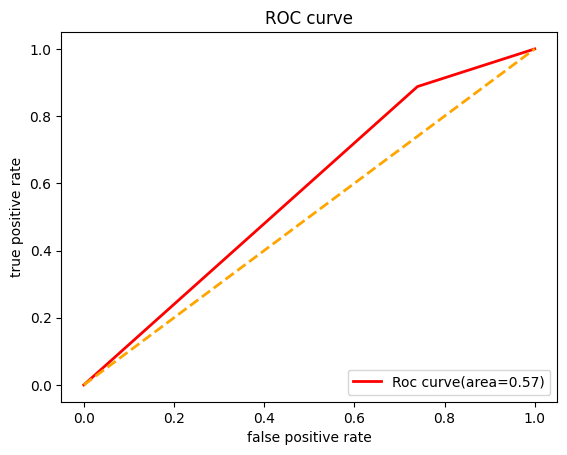

In [ ]:
fpr_Rfc1,tpr_Rfc1,treshold=roc_curve(y_test,y_pred_Rfc1)
auc_Rfc1=auc(fpr_Rfc1,tpr_Rfc1)
plt.figure()
lw=2
plt.plot(fpr_Rfc1,tpr_Rfc1,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_Rfc1)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**model creation:AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
Abc=AdaBoostClassifier()
Abc.fit(x_train,y_train)

AdaBoostClassifier()

In [ ]:
y_pred_Abc=Abc.predict(x_test)
y_pred_Abc

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1])

**performance measures of AdaBoostClassifier**

0.6742857142857143
              precision    recall  f1-score   support

           0       0.41      0.32      0.36        50
           1       0.75      0.82      0.78       125

    accuracy                           0.67       175
   macro avg       0.58      0.57      0.57       175
weighted avg       0.65      0.67      0.66       175

ROC_AUC_SCORE= 0.568


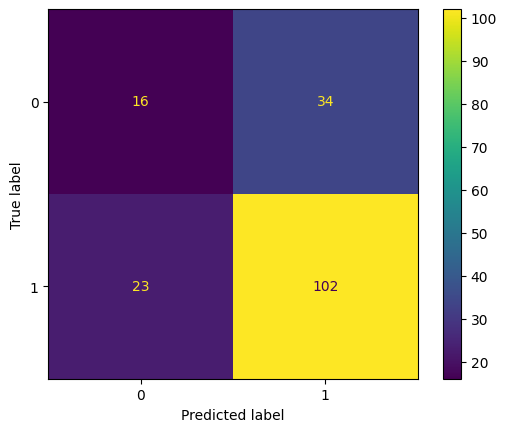

In [ ]:
print(accuracy_score(y_test,y_pred_Abc))
print(classification_report(y_test,y_pred_Abc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_Abc))
print('ROC_AUC_SCORE=',roc_auc_score(y_test,y_pred_Abc))

**ROC AUC Curve**

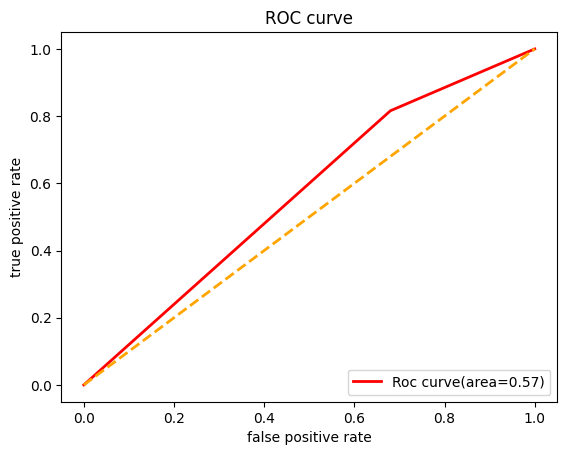

In [ ]:
fpr_Abc,tpr_Abc,treshold=roc_curve(y_test,y_pred_Abc)
auc_Abc=auc(fpr_Abc,tpr_Abc)
plt.figure()
lw=2
plt.plot(fpr_Abc,tpr_Abc,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_Abc)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Model Creation:XGBClassifier**

In [ ]:
from xgboost import XGBClassifier
xgc=XGBClassifier()
xgc.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xgc=xgc.predict(x_test)
y_pred_xgc

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])

**performance measures of XGBClassifier**

68.57142857142857
              precision    recall  f1-score   support

           0       0.44      0.36      0.40        50
           1       0.76      0.82      0.79       125

    accuracy                           0.69       175
   macro avg       0.60      0.59      0.59       175
weighted avg       0.67      0.69      0.68       175

ROC_AUC_SCORE= 0.5879999999999999


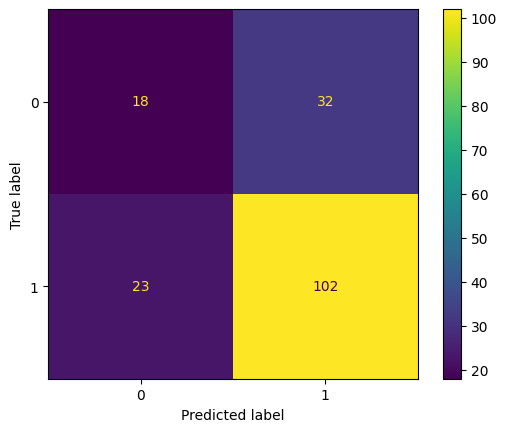

In [ ]:
print(accuracy_score(y_test,y_pred_xgc)*100)
print(classification_report(y_test,y_pred_xgc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xgc))
print('ROC_AUC_SCORE=',roc_auc_score(y_test,y_pred_xgc))

**ROC AUC Curve**

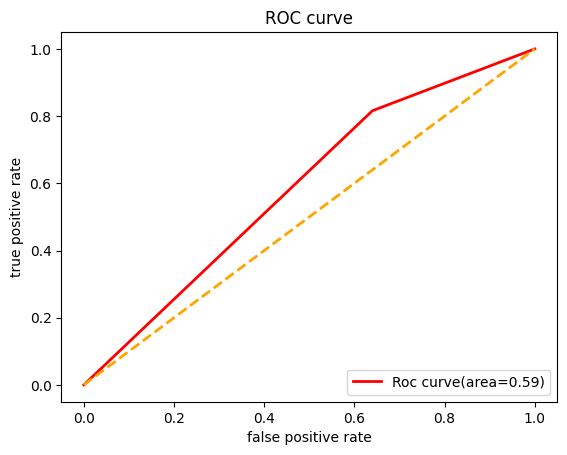

In [ ]:
fpr_xgc,tpr_xgc,treshold=roc_curve(y_test,y_pred_xgc)
auc_xgc=auc(fpr_xgc,tpr_xgc)
plt.figure()
lw=2
plt.plot(fpr_xgc,tpr_xgc,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_xgc)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**check correlation and feature selection**


In [ ]:
df.corr()

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
Age,1.000000,0.056560,0.011763,0.007529,0.080425,-0.086883,-0.019910,-0.187461,-0.265924,-0.215968,0.137351
Gender,0.056560,1.000000,0.089291,0.100436,-0.027496,0.082332,0.080336,-0.089121,-0.093799,-0.003184,0.082416
TB,0.011763,0.089291,1.000000,0.874618,0.206669,0.214065,0.237831,-0.008099,-0.222250,-0.206015,0.220208
DB,0.007529,0.100436,0.874618,1.000000,0.234939,0.233894,0.257544,-0.000139,-0.228531,-0.199850,0.246046
Alkphos,0.080425,-0.027496,0.206669,0.234939,1.000000,0.125680,0.167196,-0.028514,-0.165453,-0.233784,0.184866
Sgpt,-0.086883,0.082332,0.214065,0.233894,0.125680,1.000000,0.791966,-0.042518,-0.029742,-0.002254,0.163416
Sgot,-0.019910,0.080336,0.237831,0.257544,0.167196,0.791966,1.000000,-0.025645,-0.085290,-0.069930,0.151934
TP,-0.187461,-0.089121,-0.008099,-0.000139,-0.028514,-0.042518,-0.025645,1.000000,0.784053,0.233828,-0.035008
ALB,-0.265924,-0.093799,-0.222250,-0.228531,-0.165453,-0.029742,-0.085290,0.784053,1.000000,0.686091,-0.161388
A/G Ratio,-0.215968,-0.003184,-0.206015,-0.199850,-0.233784,-0.002254,-0.069930,0.233828,0.686091,1.000000,-0.162144


**Heat map**

<Axes: >

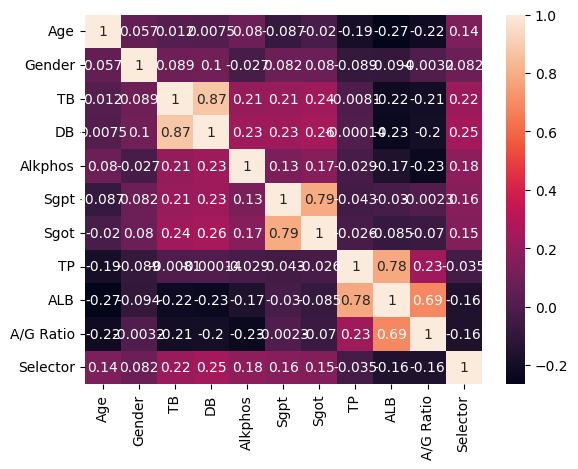

In [ ]:
sns.heatmap(df.corr(),annot=True)

**drop the unwanted columns**

In [ ]:
df.drop(['TP'],axis=1,inplace=True)
df


,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,ALB,A/G Ratio,Selector
0,65,0,0.7,0.1,187,16,18,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,1.6,0.37,0
579,40,1,0.6,0.1,98,35,31,3.2,1.10,1
580,52,1,0.8,0.2,245,48,49,3.2,1.00,1
581,31,1,1.3,0.5,184,29,32,3.4,1.00,1


**spliting the dataset into input and output variables**

In [ ]:
X=df.iloc[:,:-1]
X

,Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,ALB,A/G Ratio
0,65,0,0.7,0.1,187,16,18,3.3,0.90
1,62,1,10.9,5.5,699,64,100,3.2,0.74
2,62,1,7.3,4.1,490,60,68,3.3,0.89
3,58,1,1.0,0.4,182,14,20,3.4,1.00
4,72,1,3.9,2.0,195,27,59,2.4,0.40
...,...,...,...,...,...,...,...,...,...
578,60,1,0.5,0.1,500,20,34,1.6,0.37
579,40,1,0.6,0.1,98,35,31,3.2,1.10
580,52,1,0.8,0.2,245,48,49,3.2,1.00
581,31,1,1.3,0.5,184,29,32,3.4,1.00


In [ ]:
y=df.iloc[:,-1]
y

0      1
1      1
2      1
3      1
4      1
      ..
578    0
579    1
580    1
581    1
582    0
Name: Selector, Length: 583, dtype: int64

**imbalanced datapoints handling**

In [ ]:
from imblearn.over_sampling import SMOTE
os=SMOTE(random_state=1)
X_os,y_os=os.fit_resample(X,y)
X_os,y_os

(     Age  Gender         TB        DB  Alkphos  Sgpt  Sgot       ALB  \
 0     65       0   0.700000  0.100000      187    16    18  3.300000   
 1     62       1  10.900000  5.500000      699    64   100  3.200000   
 2     62       1   7.300000  4.100000      490    60    68  3.300000   
 3     58       1   1.000000  0.400000      182    14    20  3.400000   
 4     72       1   3.900000  2.000000      195    27    59  2.400000   
 ..   ...     ...        ...       ...      ...   ...   ...       ...   
 827   61       1   0.825014  0.200000      192    34    37  3.525071   
 828   17       1   0.702228  0.151114      309    42    47  3.702228   
 829   33       0   0.591810  0.145905      376    26    48  3.878666   
 830    5       0   0.968962  0.240566      350    31    34  3.959434   
 831   62       1   0.600000  0.119604      148    37   117  2.737227   
 
      A/G Ratio  
 0     0.900000  
 1     0.740000  
 2     0.890000  
 3     1.000000  
 4     0.400000  
 ..         ..

**Data Normalization using MinMaxScaler**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X_os)
X_scaled

array([[0.70930233, 0.        , 0.00402145, ..., 0.00162635, 0.52173913,
        0.24      ],
       [0.6744186 , 1.        , 0.14075067, ..., 0.0182964 , 0.5       ,
        0.176     ],
       [0.6744186 , 1.        , 0.0924933 , ..., 0.01179101, 0.52173913,
        0.236     ],
       ...,
       [0.3372093 , 0.        , 0.00257117, ..., 0.00772515, 0.64753614,
        0.28327614],
       [0.01162791, 0.        , 0.00762683, ..., 0.00487904, 0.66509442,
        0.27675475],
       [0.6744186 , 1.        , 0.00268097, ..., 0.02175239, 0.39939726,
        0.38273251]])

**spliting dataset into training and testing data**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_os,test_size=0.3,random_state=1)

In [ ]:
X_train.shape,y_train.shape

((582, 9), (582,))

In [ ]:
X_test.shape,y_test.shape

((250, 9), (250,))

Model creation:KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_pred1=knn.predict(X_test)
y_pred1

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77       129
           1       0.79      0.64      0.70       121

    accuracy                           0.74       250
   macro avg       0.75      0.74      0.74       250
weighted avg       0.75      0.74      0.74       250



**Hyperparameter Tuning:KNeighborsClassifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
params={'n_neighbors':[1,3,5,7,9],'weights':['distance','uniform'],'algorithm':['auto','ball_tree','kd_tree','brute']}
clf=GridSearchCV(knn,params,cv=10,scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 3, 5, 7, 9],
                         'weights': ['distance', 'uniform']},
             scoring='accuracy')

In [ ]:
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'distance'}


In [ ]:
knn1=KNeighborsClassifier(n_neighbors=9,algorithm='auto',weights='distance')
knn1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [ ]:
y_pred_knn1=knn1.predict(X_test)
y_pred_knn1

array([0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0])

**performance measure of tuned KNeighborsclassifier**

73.6
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       129
           1       0.85      0.55      0.67       121

    accuracy                           0.74       250
   macro avg       0.77      0.73      0.73       250
weighted avg       0.76      0.74      0.73       250

ROC_AUC-SCORE= 73.03478762252547


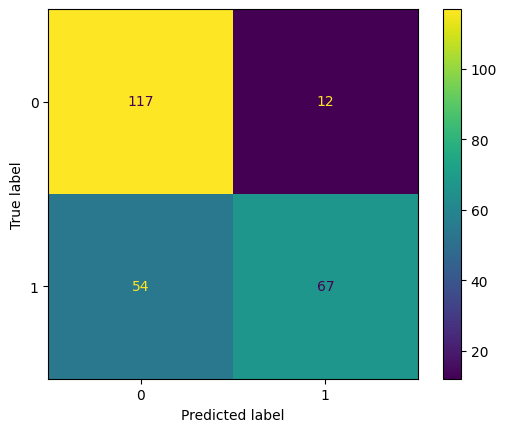

In [ ]:
print(accuracy_score(y_test,y_pred_knn1)*100)
print(classification_report(y_test,y_pred_knn1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_knn1))
print("ROC_AUC-SCORE=",roc_auc_score(y_test,y_pred_knn1)*100)

ROC AUC curve

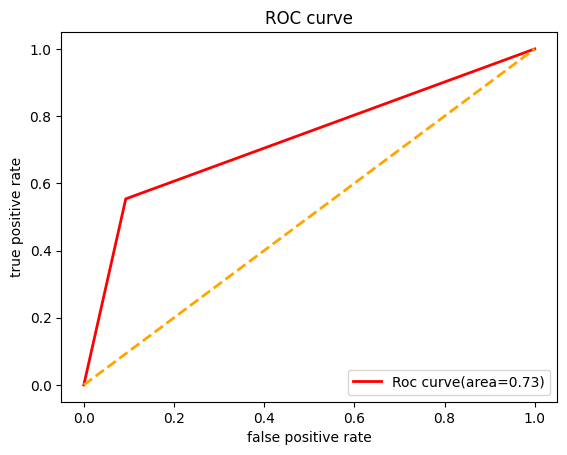

In [ ]:
fpr_knn1,tpr_knn1,treshold=roc_curve(y_test,y_pred_knn1)
auc_knn1=auc(fpr_knn1,tpr_knn1)
plt.figure()
lw=2
plt.plot(fpr_knn1,tpr_knn1,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_knn1)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Model creation:SVC**

In [ ]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC()

In [ ]:
y_pred_sv=sv.predict(X_test)
y_pred_sv

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0])

**performance measure of svc**

              precision    recall  f1-score   support

           0       0.68      0.91      0.78       129
           1       0.86      0.54      0.66       121

    accuracy                           0.73       250
   macro avg       0.77      0.73      0.72       250
weighted avg       0.76      0.73      0.72       250



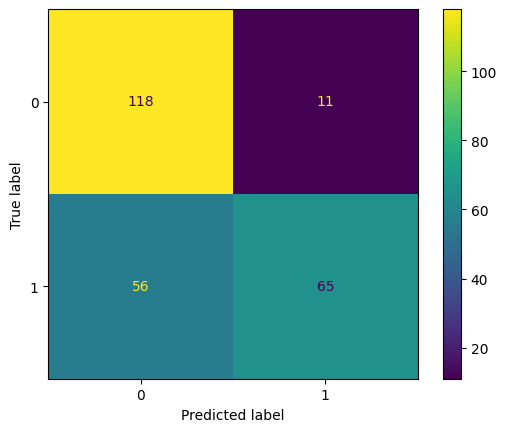

In [ ]:
print(classification_report(y_test,y_pred_sv))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv))

**Hyperparameter Tuning:SVC**

In [ ]:
params={'kernel':['linear','poly','rbf'],'gamma':['scale','auto'],'decision_function_shape':['ovo','ovr']}
clf1=GridSearchCV(sv,params,cv=10,scoring='accuracy')
clf1.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']},
             scoring='accuracy')

In [ ]:
print(clf1.best_params_)

{'decision_function_shape': 'ovo', 'gamma': 'scale', 'kernel': 'rbf'}


In [ ]:
sv1=SVC(decision_function_shape='ovo',gamma='scale',kernel='rbf')
sv1.fit(X_train,y_train)


SVC(decision_function_shape='ovo')

In [ ]:
y_pred_sv1=sv1.predict(X_test)
y_pred_sv1

array([0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0])

**performance measures of Tuned SVC**

0.732
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       129
           1       0.86      0.54      0.66       121

    accuracy                           0.73       250
   macro avg       0.77      0.73      0.72       250
weighted avg       0.76      0.73      0.72       250

ROC_AUC_SCORE= 0.7259593824075853


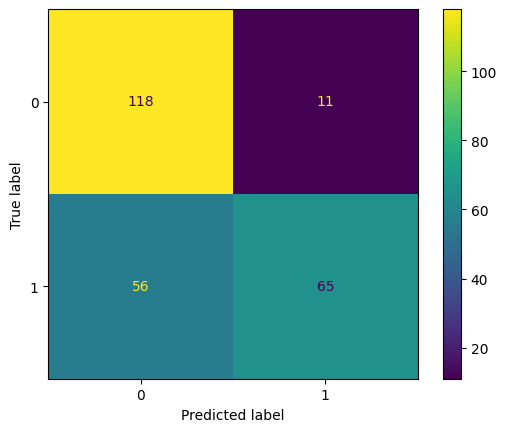

In [ ]:
print(accuracy_score(y_test,y_pred_sv1))
print(classification_report(y_test,y_pred_sv1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_sv1))
print('ROC_AUC_SCORE=',roc_auc_score(y_test,y_pred_sv1))

ROC AUC Curve

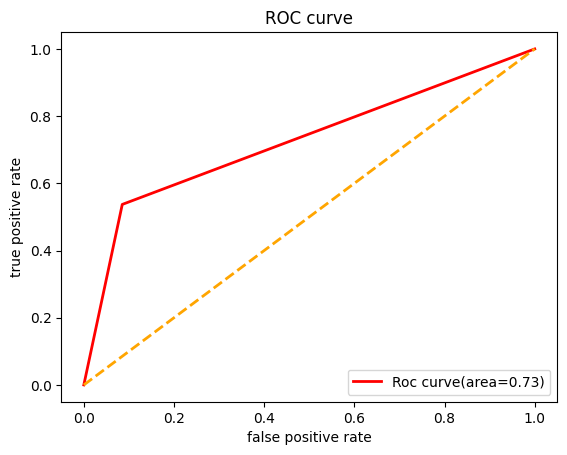

In [ ]:
fpr_sv1,tpr_sv1,treshold=roc_curve(y_test,y_pred_sv1)
auc_sv1=auc(fpr_sv1,tpr_sv1)
plt.figure()
lw=2
plt.plot(fpr_sv1,tpr_sv1,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_sv1)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Model Creation:Naive_Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

In [ ]:
y_pred_nb=nb.predict(X_test)
y_pred_nb

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0])

**performance measures of Naives_Bayes**

0.716
              precision    recall  f1-score   support

           0       0.65      0.98      0.78       129
           1       0.96      0.43      0.59       121

    accuracy                           0.72       250
   macro avg       0.81      0.71      0.69       250
weighted avg       0.80      0.72      0.69       250

ROC_AUC_SCORE= 0.707124095073355


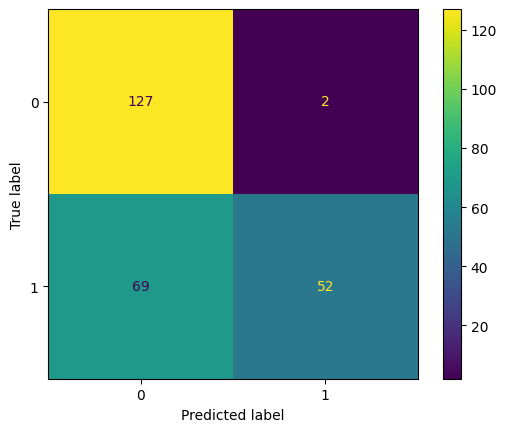

In [ ]:
print(accuracy_score(y_test,y_pred_nb))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_nb))
print(classification_report(y_test,y_pred_nb))
print('ROC_AUC_SCORE=',roc_auc_score(y_test,y_pred_nb))


ROC AUC Curve

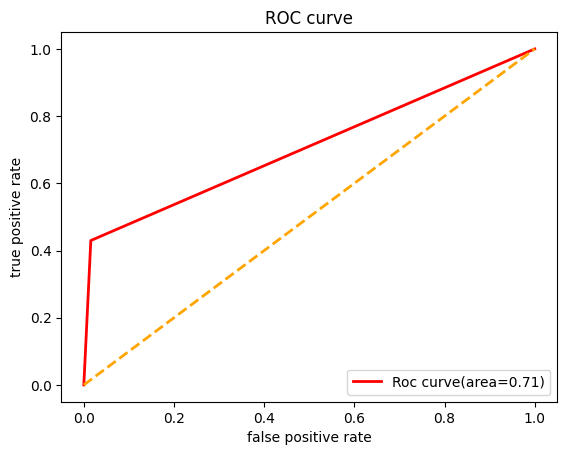

In [ ]:
fpr_nb,tpr_nb,treshold=roc_curve(y_test,y_pred_nb)
auc_nb=auc(fpr_nb,tpr_nb)
plt.figure()
lw=2
plt.plot(fpr_nb,tpr_nb,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_nb)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Model Creation:DecisionTreeClassifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
y_pred_dtc=dtc.predict(X_test)
y_pred_dtc

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0])

**performance measures of DecisionTreeclassifier**

              precision    recall  f1-score   support

           0       0.77      0.84      0.81       129
           1       0.82      0.74      0.77       121

    accuracy                           0.79       250
   macro avg       0.79      0.79      0.79       250
weighted avg       0.79      0.79      0.79       250



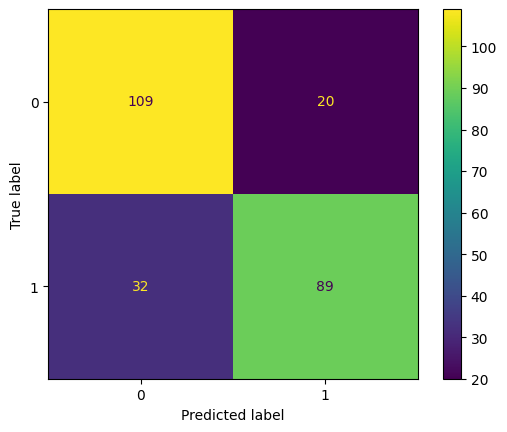

In [ ]:
print(classification_report(y_test,y_pred_dtc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dtc))

**Hyperparameter Tuning:DecisionTreeClassifier**

In [ ]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':[4,5,6,7,8,9,10]}
clf3=GridSearchCV(dtc,params,cv=10,scoring='accuracy')
clf3.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(criterion='entropy'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
print(clf3.best_params_)

{'criterion': 'entropy', 'max_depth': 10, 'splitter': 'best'}


In [ ]:
dtc1=DecisionTreeClassifier(criterion='entropy',max_depth=10,splitter='best',random_state=1)
dtc1.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=1)

In [ ]:
y_pred_dtc1=dtc1.predict(X_test)
y_pred_dtc1

array([1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0])

**performance measures of tuned DecisionTreeClassifier**

0.768
              precision    recall  f1-score   support

           0       0.74      0.84      0.79       129
           1       0.81      0.69      0.74       121

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250

ROC_AUC_SCORE= 0.7654558267666091


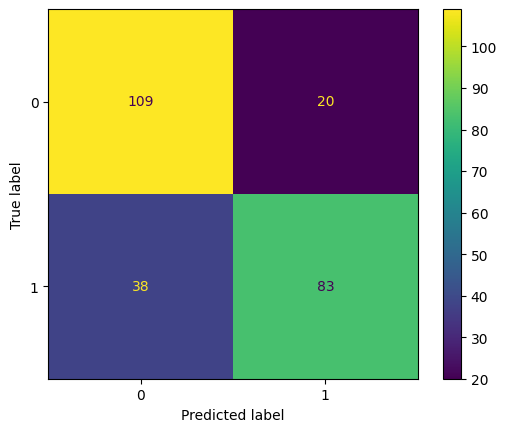

In [ ]:
print(accuracy_score(y_test,y_pred_dtc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_dtc1))
print(classification_report(y_test,y_pred_dtc1))
print('ROC_AUC_SCORE=',roc_auc_score(y_test,y_pred_dtc1))

ROC AUC Curve

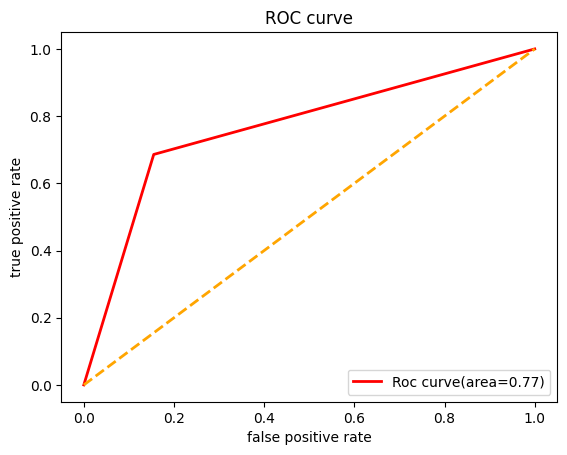

In [ ]:
fpr_dtc1,tpr_dtc1,treshold=roc_curve(y_test,y_pred_dtc1)
auc_dtc1=auc(fpr_dtc1,tpr_dtc1)
plt.figure()
lw=2
plt.plot(fpr_dtc1,tpr_dtc1,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_dtc1)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Model Creation:RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(criterion='entropy',n_estimators=50,random_state=1)
rfc.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=1)

In [ ]:
y_pred_rfc=rfc.predict(X_test)
y_pred_rfc

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0])

**performance measure of RandomForestClassifier**

              precision    recall  f1-score   support

           0       0.79      0.91      0.85       129
           1       0.89      0.74      0.81       121

    accuracy                           0.83       250
   macro avg       0.84      0.83      0.83       250
weighted avg       0.84      0.83      0.83       250



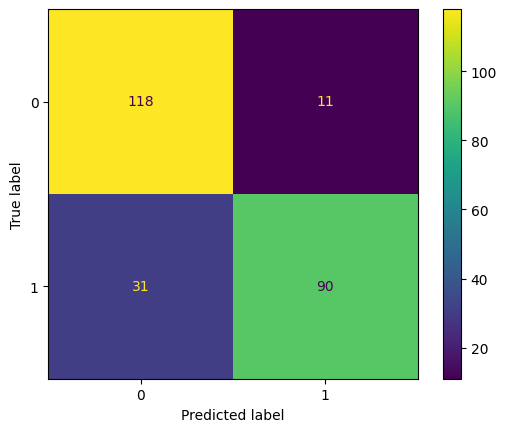

In [ ]:
print(classification_report(y_test,y_pred_rfc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc))

**Hyperparameter Tuning:RandomForestClassifier**

In [ ]:
params={'n_estimators':[50,100,150,200],'max_features':['sqrt','log2'],'class_weight':['balanced','balanced_subsample'],'criterion':['gini','entropy']}
clf4=GridSearchCV(rfc,params,cv=10,scoring='accuracy',)
clf4.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(criterion='entropy',
                                              n_estimators=50, random_state=1),
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [ ]:
print(clf4.best_params_)

{'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 200}


In [ ]:
rfc1=RandomForestClassifier(class_weight='balanced',criterion='entropy',max_features='log2',n_estimators=50)
rfc1.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', criterion='entropy',
                       max_features='log2', n_estimators=50)

In [ ]:
y_pred_rfc1=rfc1.predict(X_test)
y_pred_rfc1

array([0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0])

**performance measure of RandomForestClassifier**

              precision    recall  f1-score   support

           0       0.79      0.88      0.84       129
           1       0.86      0.75      0.80       121

    accuracy                           0.82       250
   macro avg       0.83      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



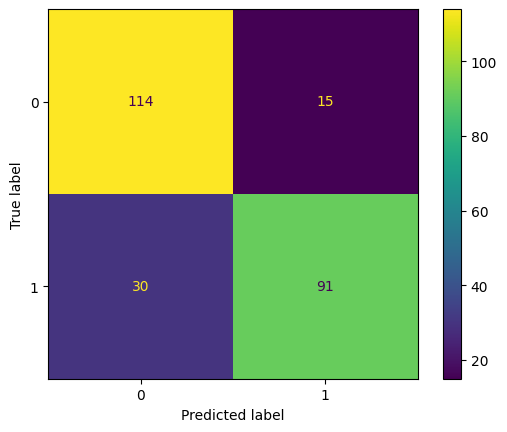

In [ ]:
print(classification_report(y_test,y_pred_rfc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc1))

**performance measure of tuned RandomForestClassifier**

0.82
              precision    recall  f1-score   support

           0       0.79      0.88      0.84       129
           1       0.86      0.75      0.80       121

    accuracy                           0.82       250
   macro avg       0.83      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250

ROC_AUC_SCORE= 0.8178935229675187


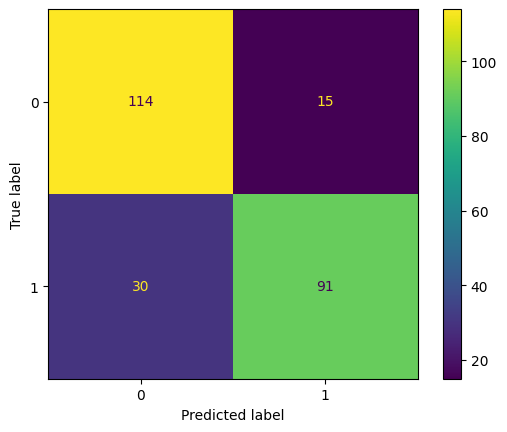

In [ ]:
print(accuracy_score(y_test,y_pred_rfc1))
print(classification_report(y_test,y_pred_rfc1))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_rfc1))
print('ROC_AUC_SCORE=',roc_auc_score(y_test,y_pred_rfc1))


ROC AUC Curve

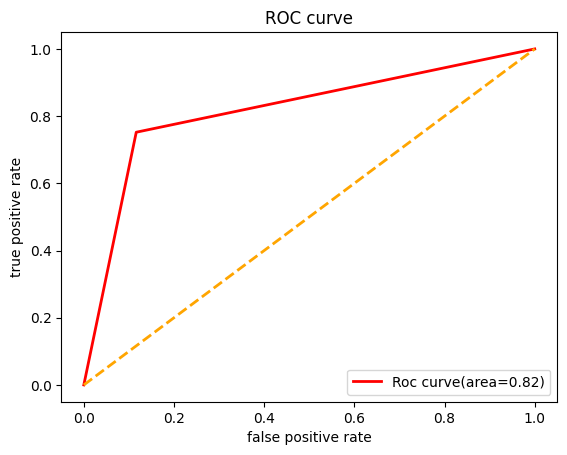

In [ ]:
fpr_rfc1,tpr_rfc1,treshold=roc_curve(y_test,y_pred_rfc1)
auc_rfc1=auc(fpr_rfc1,tpr_rfc1)
plt.figure()
lw=2
plt.plot(fpr_rfc1,tpr_rfc1,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_rfc1)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Model creation:AdaBoostClassifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier()
abc.fit(X_train,y_train)


AdaBoostClassifier()

In [ ]:
y_pred_abc=abc.predict(X_test)
y_pred_abc

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0])

**performance measures of AdaboostClassifier**

0.772
              precision    recall  f1-score   support

           0       0.76      0.81      0.79       129
           1       0.79      0.73      0.76       121

    accuracy                           0.77       250
   macro avg       0.77      0.77      0.77       250
weighted avg       0.77      0.77      0.77       250

ROC_AUC_SCORE= 0.7706131078224101


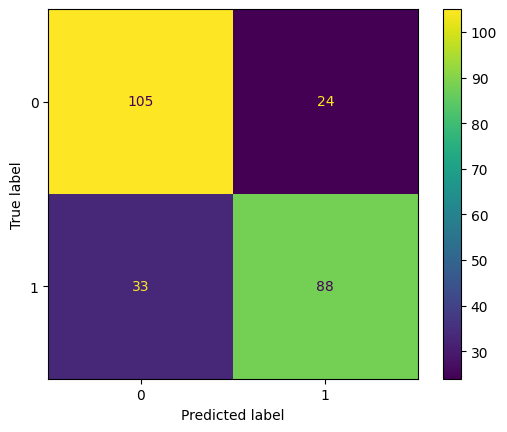

In [ ]:
print(accuracy_score(y_test,y_pred_abc))
print(classification_report(y_test,y_pred_abc))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_abc))
print('ROC_AUC_SCORE=',roc_auc_score(y_test,y_pred_abc))

**ROC AUC Curve**

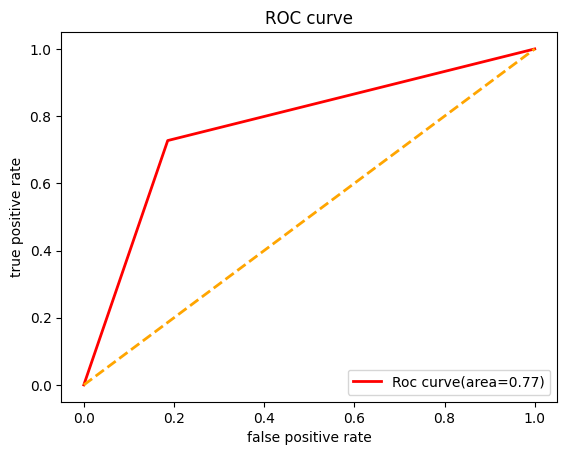

In [ ]:
fpr_abc,tpr_abc,treshold=roc_curve(y_test,y_pred_abc)
auc_abc=auc(fpr_abc,tpr_abc)
plt.figure()
lw=2
plt.plot(fpr_abc,tpr_abc,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_abc)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

**Model Creation:XGBCaassifier**

In [ ]:
from xgboost import XGBClassifier
xg=XGBClassifier()
xg.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_xg=xg.predict(X_test)
y_pred_xg

array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0])

**performance measures XGBClassifier**

In [ ]:
print(accuracy_score(y_test,y_pred_xgc)*100)
print(classification_report(y_test,y_pred_xg))
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred_xg))
print('ROC_AUC_SCORE=',roc_auc_score(y_test,y_pred_xg))

ValueError: Found input variables with inconsistent numbers of samples: [250, 175]

ROC AUC Curve

In [ ]:
fpr_xg,tpr_xg,treshold=roc_curve(y_test,y_pred_xg)
auc_xg=auc(fpr_xg,tpr_xg)
plt.figure()
lw=2
plt.plot(fpr_xg,tpr_xg,color='red',lw=lw,label='Roc curve(area=%0.2f)' %auc_xg)
plt.plot([0,1],[0,1],color='orange',lw=lw,linestyle='--')
plt.title('ROC curve')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc='lower right')
plt.show()

# **XGB classifier give the better result**

**picking heights accuracy model and scaler object for diploy representation**

In [ ]:
import pickle
pickle.dump(xg,open('lmodel.sav','wb'))
pickle.dump(scaler,open('lscaler.sav','wb'))